In [1]:
#Observations

#We can observe that the correlation between average tumor volume and weight is considered a strong positive correlation based on the correlation coefficient of 0.84

#Majority of the mice involved in this pharmaceutical tests are males, however, the difference between the number of male and female mice are extremely close (just by 1.4%)

#Based on the bar graph, capomulin and ramicane have the highest timepoint count compared to other drugs tested.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results,on="Mouse ID")
combined_df
# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
#Quantity of Mice
mice=combined_df["Mouse ID"].value_counts()
mice_df = pd.DataFrame(mice)
mice_df.count()

Mouse ID    249
dtype: int64

In [4]:
duplicate_mice=combined_df.duplicated(subset=['Mouse ID','Timepoint'])
duplicate_mice

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [5]:
duplicate_df = combined_df.loc[duplicate_mice]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
clean_df=combined_df.drop_duplicates(subset=["Mouse ID","Timepoint"])
clean_df.tail(980)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
clean_df["Mouse ID"].count()

1888

In [8]:
#Summary Statistics
tumorvolclean_df = clean_df.groupby(["Drug Regimen"])
mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_table_gby = pd.DataFrame({"Mean Tumor Volume":mean,
                              "Median Tumor Volume":median,
                              "Tumor Volume Variance":var,
                              "Tumor Volume Std. Dev.":std,
                              "Tumor Volume Std. Err.":sem})
summary_table_gby


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
summary_table_aggr = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table_aggr

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [10]:
tumorvol_df = clean_df.groupby(["Drug Regimen"])
tumorvol_df=tumorvol_df.count().head(25)
tumorvol_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,156,156,156,156,156,156,156
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


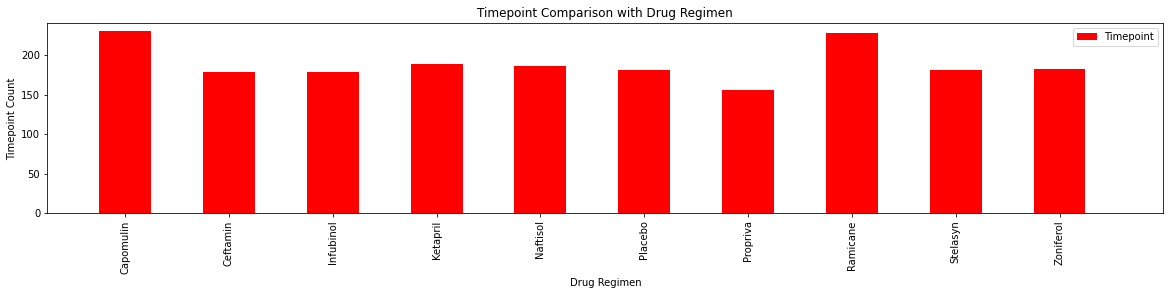

<Figure size 432x288 with 0 Axes>

In [11]:
#Bar Chart via PyPlot

timepoint=tumorvol_df["Timepoint"]
drug_reg=tumorvol_df.index

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tumorv_df = clean_df[["Drug Regimen","Timepoint"]]

# Set the index to be "State" so they will be used as labels
tumorv_df = tumorv_df.set_index("Drug Regimen")

tumorv_df = tumorv_df.groupby("Drug Regimen")
tumorv_df = tumorv_df.count()

tumorv_df.plot(kind="bar", color="r", figsize=(20,3.5))

# Set a title for the chart
plt.title("Timepoint Comparison with Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint Count")

plt.xlim(-0.75, len(drug_reg))
plt.ylim(0, max(timepoint)+10)

plt.show()
plt.tight_layout()

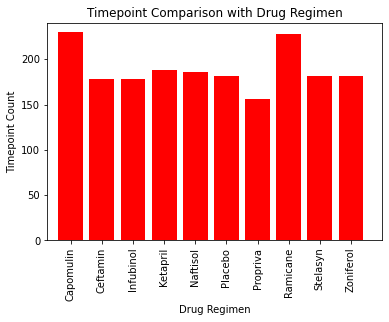

<Figure size 432x288 with 0 Axes>

In [12]:
#Bar Chart via Pandas
x_axis = np.arange(0, len(drug_reg))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Timepoint Comparison with Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint Count")

plt.xlim(-0.75, len(drug_reg))
plt.ylim(0, max(timepoint)+10)

plt.bar(x_axis, timepoint, facecolor="red", alpha=1, align="center")
plt.xticks(tick_locations, drug_reg, rotation="vertical")

plt.show()
plt.tight_layout()

In [13]:
gender_df = clean_df.groupby(["Sex"])
gender_df= gender_df.count()
gender_df

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,930,930,930,930,930,930,930
Male,958,958,958,958,958,958,958


In [14]:
mouseid=gender_df["Mouse ID"]
gender=gender_df.index

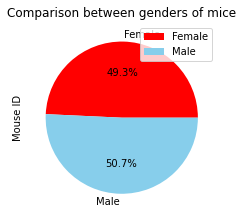

<Figure size 432x288 with 0 Axes>

In [15]:
#Pie Chart via Pandas
gender2_df = clean_df[["Sex","Mouse ID"]]

gender2_df = gender2_df.set_index("Sex")

gender2_df = gender2_df.groupby("Sex")
gender2_df = gender2_df.count()

gender2_df.plot(kind="pie", y="Mouse ID", autopct='%1.01f%%', colors = ['red', 'skyblue'], figsize=(20,3.5))

sex = gender2_df.index
mouseid2 = gender2_df["Mouse ID"]

plt.title("Comparison between genders of mice")

plt.show()
plt.tight_layout()


(-1.1130297088733214,
 1.1916028425316063,
 -1.2043644600858108,
 1.1141774263579258)

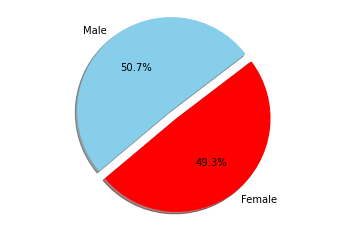

In [16]:
#Pie Chart via PyPlot
colors = ["red","skyblue"]
explode = (0.1,0)

plt.pie(mouseid, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=220)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")


In [17]:
#Quartiles, Outliers and Box and Whisker Plots


tumormax = clean_df.groupby(["Mouse ID"])['Timepoint'].max()
tumormax = tumormax.reset_index()

merged_data = tumormax.merge(clean_df,on=['Mouse ID','Timepoint'],how="left")
merged_data.head(20)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [18]:
treatment_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumorvoldata_list=[]

#Quartile calculations
for drug in treatment_list:
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tumorvoldata_list.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

#Bound calculations
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)

25.355449580000002
87.66645829999999


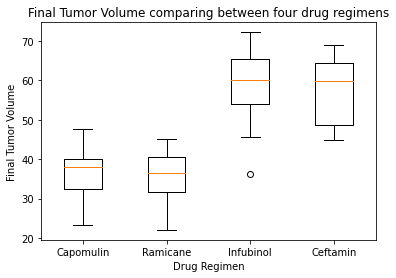

In [19]:
#Box and Whisker Plots

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume comparing between four drug regimens')
ax1.set_ylabel('Final Tumor Volume')
ax1.set_xlabel("Drug Regimen")

plt.boxplot(tumorvoldata_list, labels = treatment_list)
plt.show()

In [20]:
#Line Chart

capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
capomulin_df = capomulin_df[["Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
capomulin_df=capomulin_df.groupby("Timepoint")
capomulin_df=capomulin_df.mean()


timepoint_capomulin=capomulin_df.index
tumorv_capomulin=capomulin_df["Tumor Volume (mm3)"]

capomulin_df.head(40)


,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,44.266086
10,43.084291
15,42.064317
20,40.716325
25,39.939528
30,38.769339
35,37.816839
40,36.958001


Text(0, 0.5, 'Average Tumor Volume')

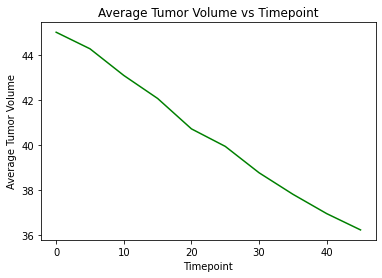

In [21]:
#Plotting the line chart
plt.plot(timepoint_capomulin, tumorv_capomulin, color="g")
plt.title("Average Tumor Volume vs Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Average Tumor Volume")

Text(0, 0.5, 'Weight (g)')

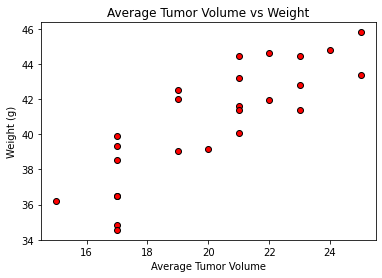

In [22]:
#Scatterplot

capomulin_scatter_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
capomulin_scatter_df = capomulin_scatter_df[["Mouse ID", "Drug Regimen", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_scatter_df = capomulin_scatter_df.groupby("Mouse ID")
capomulin_scatter_df = capomulin_scatter_df.mean("Tumor Volume (mm3)")

weight=capomulin_scatter_df["Weight (g)"]
tumorv_scatter=capomulin_scatter_df["Tumor Volume (mm3)"]
plt.scatter(weight, tumorv_scatter, marker="o", facecolors="red", edgecolors="black")

plt.title("Average Tumor Volume vs Weight")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Weight (g)")

The R-squared is: 0.7088568047708717


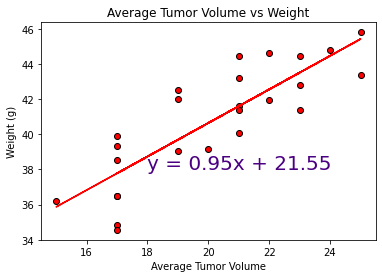

In [23]:
#Regression Model
weight=capomulin_scatter_df["Weight (g)"]
tumorv_scatter=capomulin_scatter_df["Tumor Volume (mm3)"]
(gradient, y_intercept, rvalue, pvalue, stderr) = linregress(weight, tumorv_scatter)
regress_values = weight * gradient + y_intercept
line_eq = "y = " + str(round(gradient,2)) + "x + " + str(round(y_intercept,2))

plt.scatter(weight, tumorv_scatter, marker="o", facecolors="red", edgecolors="black")
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(18,38),fontsize=20,color="indigo")

plt.title("Average Tumor Volume vs Weight")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Weight (g)")
print(f"The R-squared is: {rvalue**2}")


In [24]:
#Correlation Coefficient
correlation = st.pearsonr(weight,tumorv_scatter)
round(correlation[0],2)

0.84